In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
plt.rcParams['figure.figsize'] = 10, 6

In [3]:
nbfolder = get_ipython().starting_dir
def path(*xs):
    return os.path.join(nbfolder, '..', *xs)

### Running algorithm

In [12]:
instance = 'A-n37-k5'

In [13]:
os.makedirs(path('out'), exist_ok=True)

filename_in = path('instances', instance+'.vrp')
filename_out = path('out', instance+'.txt')

with open(filename_in, 'r') as file_in:
    with open(filename_out, 'w') as file_out:
        p = subprocess.Popen(path('bin', 'cfrs'), stdin=file_in, stdout=file_out)

### Reading Data

In [14]:
data = np.loadtxt(filename_out)

In [15]:
clusters_qty = int(np.max(data[:, 2]))+1
clusters_qty

4

In [16]:
clusters = np.split(data, np.where(data[:-1, 2] < data[1:, 2])[0]+1)

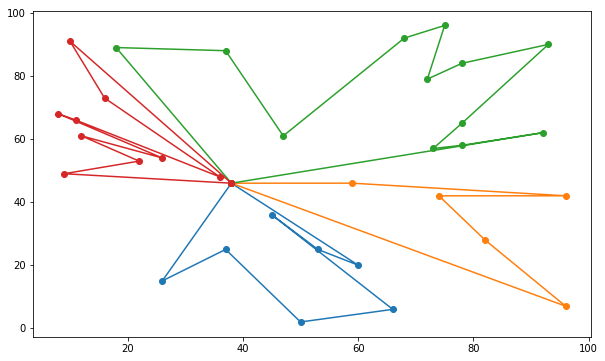

In [17]:
for cluster in clusters:
    plt.plot(cluster[:, 0], cluster[:, 1], 'do-')